# Data
[Anime.csv](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/)
  - anime_id - myanimelist.net's unique id identifying an anime.
  - name - full name of anime.
  - genre - comma separated list of genres for this anime.
  - type - movie, TV, OVA, etc.
  - episodes - how many episodes in this show. (1 if movie).
  - rating - average rating out of 10 for this anime.
  - members - number of community members that are in this anime's "group".

In [33]:
import pandas as pd

train_url = 'sample_data/anime.csv'
train_df_raw = pd.read_csv(train_url).drop('anime_id', axis=1)

train_df_raw.drop(train_df_raw[train_df_raw.episodes == 'Unknown'].index, inplace=True)
train_df_raw = train_df_raw.dropna()

In [34]:
train_df_raw

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,Under World,Hentai,OVA,1,4.28,183
12291,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [35]:
anime_type_feature = [int(x) for x in train_df_raw['type'].astype('category').cat.codes.to_list()]
episodes_feature = [int(x) for x in train_df_raw.episodes.values]
rating_feature = [float(x) for x in train_df_raw.rating.values]
members_feature = [int(x) for x in train_df_raw.members.values]

df_body = [
    anime_type_feature,
    episodes_feature,
    rating_feature,
    members_feature
]

data = pd.DataFrame(df_body, index=['type', 'episodes', 'rating', 'members']).T

In [36]:
data

,type,episodes,rating,members
0,0.0,1.0,9.37,200630.0
1,5.0,64.0,9.26,793665.0
2,5.0,51.0,9.25,114262.0
3,5.0,24.0,9.17,673572.0
4,5.0,51.0,9.16,151266.0
...,...,...,...,...
11825,3.0,1.0,4.15,211.0
11826,3.0,1.0,4.28,183.0
11827,3.0,4.0,4.88,219.0
11828,3.0,1.0,4.98,175.0


In [37]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# n_clusters = ?

clustering = AgglomerativeClustering().fit(data)
clustering
clustering.labels_

array([0, 1, 0, ..., 0, 0, 0])

# Custom GridSearch

In [90]:
import gc
gc.collect()

def Custom_GridSearch(estimator, param_grid, scoring, data):
  scores_and_params = [] # pairs of score to params (params ::= dict)

  # Cartesian product may be computed by --itertools.product--
  param_names = list(param_grid.keys())
  params_combinations = [(x,) for x in param_grid[param_names[0]]] # lists of params typles [(p1,p2,p3), (p1,p2,p3')...] with initial
  temp_params_combinations = [] # same with above, for service use
  keys_count = len(param_grid)

  for param_key_index in range(1, keys_count): # starts with second, we already have first param tuples as initial
    temp_params_combinations = list(params_combinations) # save
    params_combinations.clear()
    for param_value in param_grid[param_names[param_key_index]]:
      for param_tuple in temp_params_combinations:
        params_combinations.append((*param_tuple, param_value))

  del temp_params_combinations
  gc.collect()

  # now in params_combinations we have Cartesian product of params
  # order of params same with keys order
  # TODO - compute scores for params combinations and return it

  for prms_comb in params_combinations:
    1

  """for n_clusters_value in param_grid['n_clusters']:
    for linkage_value in param_grid['linkage']:
      step_estimator = estimator(n_clusters = n_clusters_value, linkage=linkage_value)
      step_estimator.fit(data)
      step_score = scoring(data, step_estimator.labels_)
      score = (step_score, step_estimator)
      scores_and_params.append(score)
  return scores_and_params"""

In [88]:
from sklearn.metrics import silhouette_score

max_clusters = len(data) / 2

params = {
    'n_clusters': range(2, 5),
    'linkage': ['ward', 'average', 'complete', 'single'],
    'foo': ['bar', 'baz']
}

clustering_gs_result = Custom_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = silhouette_score,
    data = data
)

In [89]:
clustering_gs_result

[(2, 'ward', 'bar'),
 (3, 'ward', 'bar'),
 (4, 'ward', 'bar'),
 (2, 'average', 'bar'),
 (3, 'average', 'bar'),
 (4, 'average', 'bar'),
 (2, 'complete', 'bar'),
 (3, 'complete', 'bar'),
 (4, 'complete', 'bar'),
 (2, 'single', 'bar'),
 (3, 'single', 'bar'),
 (4, 'single', 'bar'),
 (2, 'ward', 'baz'),
 (3, 'ward', 'baz'),
 (4, 'ward', 'baz'),
 (2, 'average', 'baz'),
 (3, 'average', 'baz'),
 (4, 'average', 'baz'),
 (2, 'complete', 'baz'),
 (3, 'complete', 'baz'),
 (4, 'complete', 'baz'),
 (2, 'single', 'baz'),
 (3, 'single', 'baz'),
 (4, 'single', 'baz')]

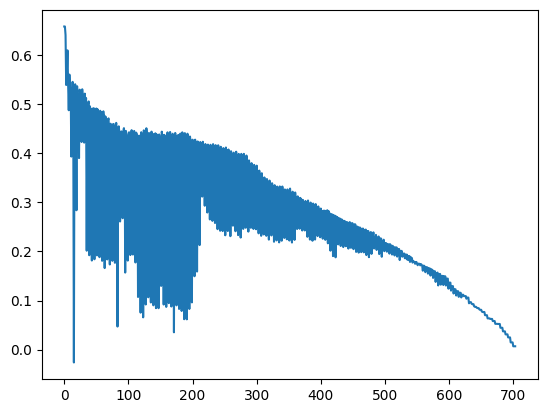

In [ ]:
import matplotlib.pyplot as plt

optimization_results = [pair[0] for pair in clustering_gs_result]

plt.plot(list(range(len(optimization_results))), optimization_results)
plt.show()

In [ ]:
optimization_results_sort = sorted(clustering_gs_result, key=lambda gs: gs[0])
best_estimator = optimization_results_sort[-1][1]

print(best_estimator.n_clusters_)
print(best_estimator.linkage)

2
average


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt

In [ ]:
linkage(data, method='average')

dendorogramma = linkage(data, method='average')

In [ ]:
cutree = cut_tree(dendorogramma, n_clusters=2 )

In [ ]:
cutree

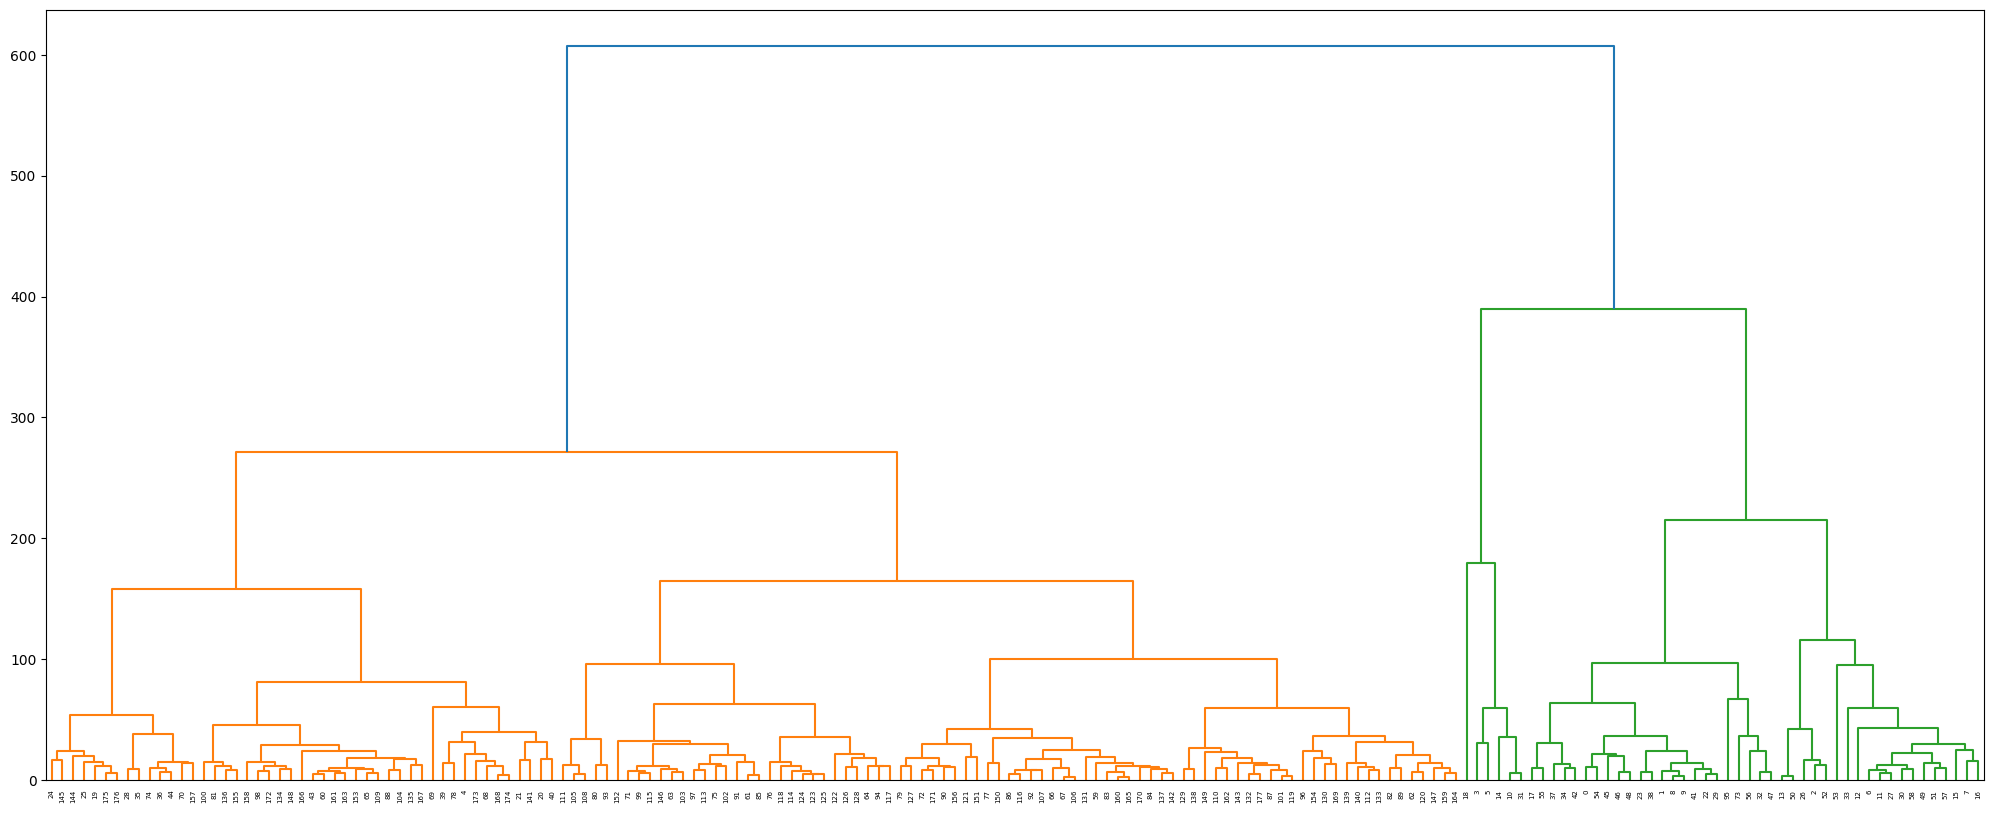

In [ ]:

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(dendorogramma)
plt.show()